## Data Loading and Cleaning

In [1]:
import pandas as pd

file_path = r'c:\Users\91735\OneDrive\Desktop\analyst content\data\projects\Antartica_Global_Assignment\Performance_Analytics&Projections_for_Business_Development\Data\Data Assignment.xlsx'

# Read all sheets into a dictionary of DataFrames
dfs = pd.read_excel(file_path, sheet_name=None)

# Extracting each sheet into separate DataFrames
df_Raj = dfs['Raj']
df_Arya = dfs['Arya']
df_Ali = dfs['Ali']

#Null Values(Holidays)
columns_to_check = ['Leads', 'Time spent on LG (mins)', 'Avg Time Per Lead (mins)']

# Creating a new dictionary to store the cleaned DataFrames
cleaned_dfs = {}

# Iterate over each sheet in the original dictionary and drop rows with missing values in the specified columns
for sheet_name, df in dfs.items():
    cleaned_dfs[sheet_name] = df.dropna(subset=columns_to_check)

df_Raj_cleaned = cleaned_dfs['Raj']
df_Arya_cleaned = cleaned_dfs['Arya']
df_Ali_cleaned = cleaned_dfs['Ali']

# Handling missing values in Other cols
df_Raj_cleaned.loc[:, 'Daily Team Review'] = df_Raj_cleaned['Daily Team Review'].ffill()
df_Raj_cleaned.loc[:, 'No. of Incomplete Leads'] = df_Raj_cleaned['No. of Incomplete Leads'].ffill()


In [2]:
df_Raj_cleaned.tail()

,Day,Date,Leads,Time spent on LG (mins),Avg Time Per Lead (mins),Daily Team Review,No. of Incomplete Leads
56,Mon,2023-08-07,11.0,250.0,23.0,Attended,0.0
57,Tue,2023-08-08,10.0,190.0,19.0,Attended,0.0
58,Wed,2023-08-09,10.0,190.0,19.0,Attended,0.0
59,Thu,2023-08-10,10.0,180.0,18.0,Missed,0.0
60,Fri,2023-08-11,11.0,200.0,18.0,Missed,0.0


## Lead Generation Efficiency

In [3]:
# Initialize an empty dictionary to store efficiency results
efficiency_results = {}

# Iterate over each associate's DataFrame in the cleaned_dfs dictionary
for sheet_name, df in cleaned_dfs.items():
    # Calculate total leads and total time spent
    total_leads = df['Leads'].sum()
    total_time_spent = df['Time spent on LG (mins)'].sum()
    
    # Calculate efficiency
    if total_time_spent > 0:  # Prevent division by zero
        efficiency = total_leads / total_time_spent
    else:
        efficiency = 0
    
    # Store efficiency result for the current associate
    efficiency_results[sheet_name] = efficiency

# Convert the efficiency results to a DataFrame for better readability
efficiency_df = pd.DataFrame(list(efficiency_results.items()), columns=['Associate', 'Efficiency'])

# Sort the DataFrame by efficiency in descending order
efficiency_df = efficiency_df.sort_values(by='Efficiency', ascending=False)

# Print the results
print("Lead Generation Efficiency by Associate:")
print(efficiency_df.head())

# Identify the associate with the highest efficiency
best_associate = efficiency_df.iloc[0]

print(f"\nAssociate with the highest efficiency: {best_associate['Associate']} with an efficiency of {best_associate['Efficiency']:.2f}")


Lead Generation Efficiency by Associate:
  Associate  Efficiency
1      Arya    0.085114
2       Ali    0.052842
0       Raj    0.042230

Associate with the highest efficiency: Arya with an efficiency of 0.09


## Insights
1)**Performance Insights:**

Arya's Higher Efficiency:
- Arya’s higher efficiency suggests that Arya is better at managing time and generating leads, possibly due to more effective strategies, techniques, or higher skill levels.

2)**Practical Implications**

Benchmarking and Target Setting:

- Arya's efficiency can be used as a benchmark for other employees. Targets or best practices can be derived from Arya’s approach to lead generations

Training and Support:

- Sharing Arya’s successful strategies with Ali and Raj could help raise their efficiency levels.
Resource Allocation:

- Employees with higher efficiency may be assigned more critical or complex tasks due to their better performance in generating leads

## Daily Performance Variabilty

In [4]:

# Dictionary to store standard deviations
std_devs = {}

# Calculate standard deviation of daily leads generated for each associate
for sheet_name, data in cleaned_dfs.items():
    if 'Leads' in data.columns:
        # Calculate the standard deviation of daily leads
        std_dev = data['Leads'].std()
        # Store in dictionary
        std_devs[sheet_name] = std_dev

# Convert results to DataFrame for better readability
std_dev_df = pd.DataFrame(list(std_devs.items()), columns=['Associate', 'Daily Leads Std Dev'])

# Find the associate with the highest variability
highest_variability = std_dev_df.loc[std_dev_df['Daily Leads Std Dev'].idxmax()]

print(std_dev_df)
print(f"Associate with highest variability: {highest_variability['Associate']} with a standard deviation of {highest_variability['Daily Leads Std Dev']:.2f}")


  Associate  Daily Leads Std Dev
0       Raj             2.653346
1      Arya             2.156951
2       Ali             3.039777
Associate with highest variability: Ali with a standard deviation of 3.04


## Insights:

1) **Variability Insight**: The standard deviation helps understand the consistency of each associate's performance. High variability (as seen with Ali) could imply:

   - Inconsistent Performance: Ali might have days with very high or very low lead generation, possibly due to external factors, changes in workload, or varying personal productivity.
   - Need for Improvement: If consistent performance is desired, Ali may need to address the factors causing such variability, like improving strategies, managing workload better, or enhancing skills.

2) **Performance Consistency**: Lower standard deviation values for Raj and Arya indicate that they are more consistent in their performance. This consistency can be beneficial for setting reliable expectations and planning resources.

3) **Conclusion**:The standard deviation values give insights into how each associate’s daily performance in lead generation varies. Ali’s higher variability suggests a need for a closer look at the causes of this inconsistency, while Raj and Arya's lower variability indicates more stable and predictable performance




## Time Management Analysis

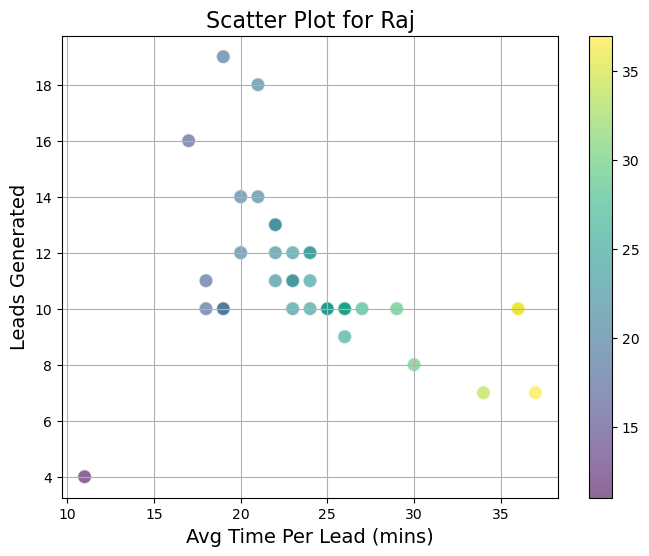

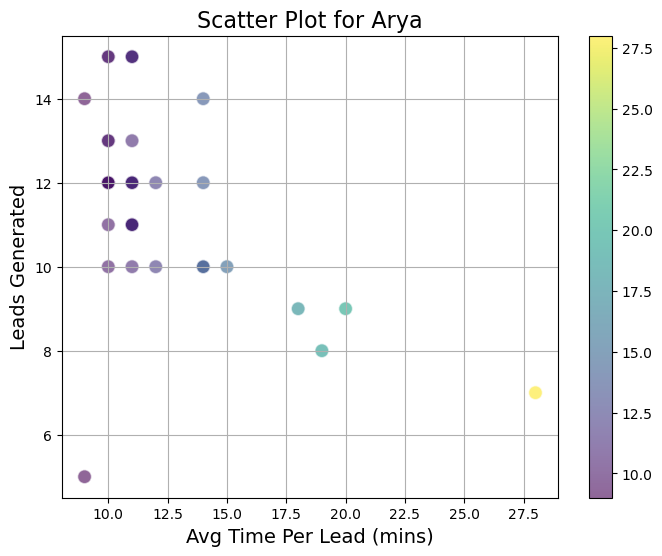

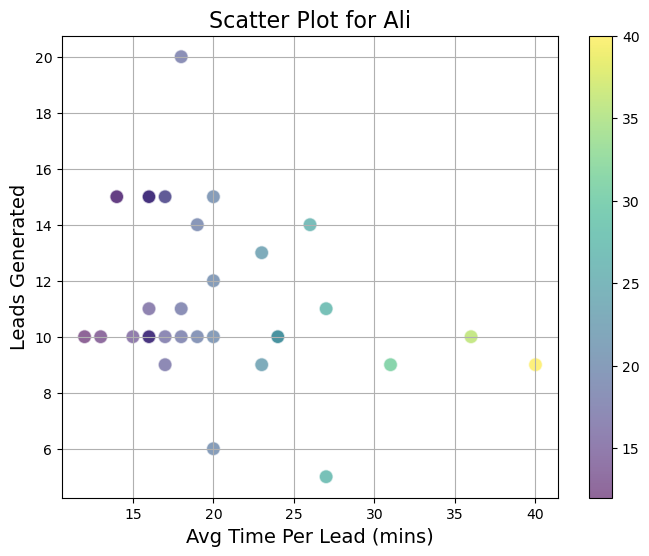

  Associate  Correlation
0       Raj    -0.334184
1      Arya    -0.508962
2       Ali    -0.362483


In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

correlation_results = {}

palette = sns.color_palette("viridis", as_cmap=True)

# Iterating over each DataFrame in the dictionary
for sheet_name, data in cleaned_dfs.items():
    if 'Avg Time Per Lead (mins)' in data.columns and 'Leads' in data.columns:
        # Calculating Pearson correlation coefficient
        correlation = data[['Avg Time Per Lead (mins)', 'Leads']].corr().iloc[0, 1]
        correlation_results[sheet_name] = correlation
        
        # Normalizing the values for coloring
        norm = plt.Normalize(data['Avg Time Per Lead (mins)'].min(), data['Avg Time Per Lead (mins)'].max())

        # Plotting the scatter plot to visualize the relationship
        plt.figure(figsize=(8, 6))
        scatter = plt.scatter(
            data['Avg Time Per Lead (mins)'], 
            data['Leads'], 
            c=data['Avg Time Per Lead (mins)'],  
            cmap='viridis', 
            norm=norm,  
            s=100, 
            alpha=0.6, 
            edgecolors='w'
        )
        plt.colorbar(scatter)
        plt.title(f'Scatter Plot for {sheet_name}', fontsize=16)
        plt.xlabel('Avg Time Per Lead (mins)', fontsize=14)
        plt.ylabel('Leads Generated', fontsize=14)
        plt.grid(True)
        plt.show()

# Converting the results into a DataFrame for better readability
correlation_df = pd.DataFrame(list(correlation_results.items()), columns=['Associate', 'Correlation'])
print(correlation_df)


## Insights

1) **Negative Correlation:**
- A negative correlation implies that as the average time spent per lead increases, the total number of leads generated tends to decrease.

2) **Strength of the Relationship:**
- Arya (-0.508962) has the strongest negative correlation, suggesting that for Arya, spending more time per lead is more significantly associated with a decrease in the number of leads generated.Also confirming her high efficiency value

3) **Interpretation:**

- Efficiency Trade-Off: The negative correlations suggest that there might be a trade-off between quality and quantity in lead generation. Associates who spend more time on each lead might be focusing on lead quality, potentially at the expense of generating a higher number of leads.
- Performance Insight: These results could be used to assess whether the associates are optimizing their time effectively.

4) **Actionable Insights:**

- Arya might benefit from strategies aimed at reducing the average time spent per lead without compromising lead quality, as this could lead to an increase in the number of leads generated.
- Ali and Raj could also explore ways to streamline their lead generation process to improve efficiency, though the urgency might be less compared to Arya.

## Impact of Daily Team Reviews

In [6]:
#changing the cleaned_dfs
cleaned_dfs['Raj']=df_Raj_cleaned
cleaned_dfs['Raj'].info()


<class 'pandas.core.frame.DataFrame'>
Index: 41 entries, 0 to 60
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Day                       41 non-null     object        
 1   Date                      41 non-null     datetime64[ns]
 2   Leads                     41 non-null     float64       
 3   Time spent on LG (mins)   41 non-null     float64       
 4   Avg Time Per Lead (mins)  41 non-null     float64       
 5   Daily Team Review         41 non-null     object        
 6   No. of Incomplete Leads   41 non-null     float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 2.6+ KB


In [7]:
df_Raj_cleaned['Daily Team Review'].value_counts()

Daily Team Review
Attended    39
Missed       2
Name: count, dtype: int64

In [8]:
review_impact_results = {}

for sheet_name, data in cleaned_dfs.items():

    if 'Daily Team Review' in data.columns and 'Leads' in data.columns:
        # Filtering data for attended and missed daily team reviews
        attended = data[data['Daily Team Review'] == 'Attended']
        missed = data[data['Daily Team Review'] == 'Missed']
        
        # Calculating average leads for attended and missed days
        avg_leads_attended = attended['Leads'].mean()
        avg_leads_missed = missed['Leads'].mean()
        
        # Calculating the percentage difference
        if avg_leads_missed != 0:  # Avoid division by zero
            percentage_difference = ((avg_leads_attended - avg_leads_missed) / avg_leads_missed) * 100
        else:
            percentage_difference = float('inf')  # Infinite increase if missed days have 0 leads

        # Store the results
        review_impact_results[sheet_name] = {
            'Avg Leads (Attended)': avg_leads_attended,
            'Avg Leads (Missed)': avg_leads_missed,
            'Percentage Difference': percentage_difference
        }

# Converting the results into a DataFrame for better readability
review_impact_df = pd.DataFrame.from_dict(review_impact_results, orient='index')
review_impact_df = review_impact_df.reset_index().rename(columns={'index': 'Associate'})

print(review_impact_df)


  Associate  Avg Leads (Attended)  Avg Leads (Missed)  Percentage Difference
0       Raj             10.923077                10.5               4.029304
1      Arya             11.560976                 NaN                    NaN
2       Ali             11.925000                11.0               8.409091


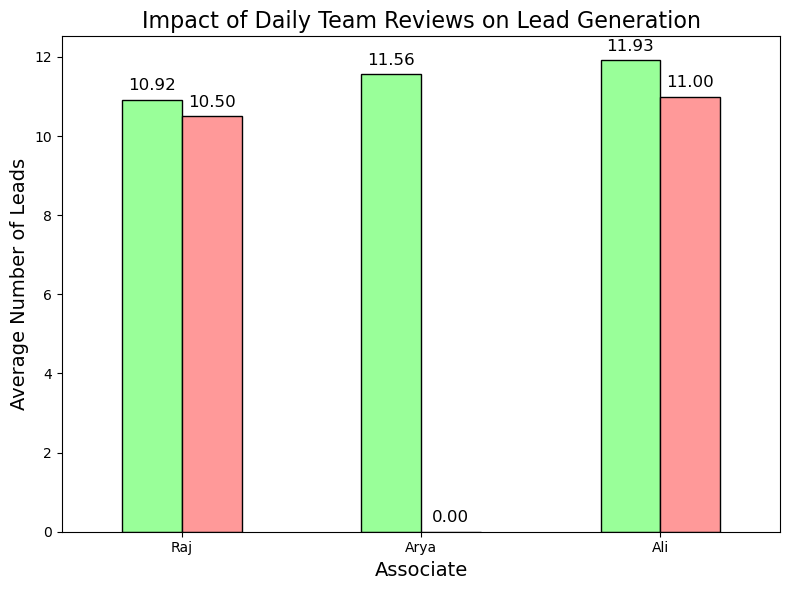

In [9]:
# Create a bar plot to visualize the average leads on attended vs. missed days for each associate
fig, ax = plt.subplots(figsize=(8, 6))

# Plot the data
review_impact_df.set_index('Associate')[['Avg Leads (Attended)', 'Avg Leads (Missed)']].plot(
    kind='bar', ax=ax, color=['#99ff99', '#ff9999'], edgecolor='black'
)

# Add title and labels
ax.set_title('Impact of Daily Team Reviews on Lead Generation', fontsize=16)
ax.set_ylabel('Average Number of Leads', fontsize=14)
ax.set_xlabel('Associate', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=0)

# Display the percentage difference on the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')
plt.legend().remove()
# Show the plot
plt.tight_layout()
plt.show()


## Insight 
1) **Raj:** The percentage difference of 4.03% suggests that attending team reviews has a modest positive impact on his performance.

2) **Arya:** Arya has consistently attended all team reviews. This could indicate a high level of commitment and may correlate with steady performance and high efficiency.

3) **Ali:** The 8.41% positive difference indicates that Ali performs better when he participates in team reviews.

Overall, attending team reviews appears to have a positive impact on lead generation, with Ali showing the most significant improvement when attending reviews. Arya's consistent attendance reflect a strong work ethic or consistent performance.